<center><h1>chen_jacqueline_HW5</h1></center>
<br>
<br>


Name: Jacqueline Chen
<br>
Github Username: jchen741
<br>
USC ID: 7983593463

## 1. Decision Trees as Interpretable Models

Import packages

In [2]:
import pandas as pd
import os
import numpy as np
path =os.getcwd()
print(path)
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import xgboost


/Users/jacy/Documents/masters/dsci 552/homework/homework-5-jchen741/notebook


### (a) Obtain Data

Get the Accute Inamations Data Set

In [3]:
columns = ['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing', 'Micturition pains','Urethra issues','Inflammation of bladder','Nephritis of renal pelvis']
data=pd.read_csv('../data/diagnosis.data', encoding='utf-16', sep='\t', decimal=',', header = None, names = columns)
display(data)
data['Temperature of patient'].astype(float)
# data['Temperature of patient']=data['Temperature of patient'].apply(lambda x:float(str(x).replace(',','.')))

Temperature of patient Occurrence of nausea Lumbar pain Urine pushing  \
0                      35.5                   no         yes            no   
1                      35.9                   no          no           yes   
2                      35.9                   no         yes            no   
3                      36.0                   no          no           yes   
4                      36.0                   no         yes            no   
..                      ...                  ...         ...           ...   
115                    41.4                   no         yes           yes   
116                    41.5                   no          no            no   
117                    41.5                  yes         yes            no   
118                    41.5                   no         yes           yes   
119                    41.5                   no         yes           yes   

    Micturition pains Urethra issues Inflammation of bladder  \
0                  no             no                      no   
1                 yes            yes                     yes   
2                  no             no                      no   
3                 yes            yes                     yes   
4                  no             no                      no   
..                ...            ...                     ...   
115                no            yes                      no   
116                no             no                      no   
117               yes             no                      no   
118                no            yes                      no   
119                no            yes                      no   

    Nephritis of renal pelvis  
0                          no  
1                          no  
2                          no  
3                          no  
4                          no  
..                        ...  
115                       yes  
116                        no  
117                       yes  
118                       yes  
119                       yes  

[120 rows x 8 columns]

0      35.5
1      35.9
2      35.9
3      36.0
4      36.0
       ... 
115    41.4
116    41.5
117    41.5
118    41.5
119    41.5
Name: Temperature of patient, Length: 120, dtype: float64

Last two columns are decision columns

In [4]:
binary = preprocessing.LabelEncoder()
for col in ['Occurrence of nausea','Lumbar pain','Urine pushing','Micturition pains','Urethra issues']:
    data[col]=binary.fit_transform(data[col])
display(data)

Temperature of patient  Occurrence of nausea  Lumbar pain  Urine pushing  \
0                      35.5                     0            1              0   
1                      35.9                     0            0              1   
2                      35.9                     0            1              0   
3                      36.0                     0            0              1   
4                      36.0                     0            1              0   
..                      ...                   ...          ...            ...   
115                    41.4                     0            1              1   
116                    41.5                     0            0              0   
117                    41.5                     1            1              0   
118                    41.5                     0            1              1   
119                    41.5                     0            1              1   

     Micturition pains  Urethra issues Inflammation of bladder  \
0                    0               0                      no   
1                    1               1                     yes   
2                    0               0                      no   
3                    1               1                     yes   
4                    0               0                      no   
..                 ...             ...                     ...   
115                  0               1                      no   
116                  0               0                      no   
117                  1               0                      no   
118                  0               1                      no   
119                  0               1                      no   

    Nephritis of renal pelvis  
0                          no  
1                          no  
2                          no  
3                          no  
4                          no  
..                        ...  
115                       yes  
116                        no  
117                       yes  
118                       yes  
119                       yes  

[120 rows x 8 columns]

### (b) Build a decision tree

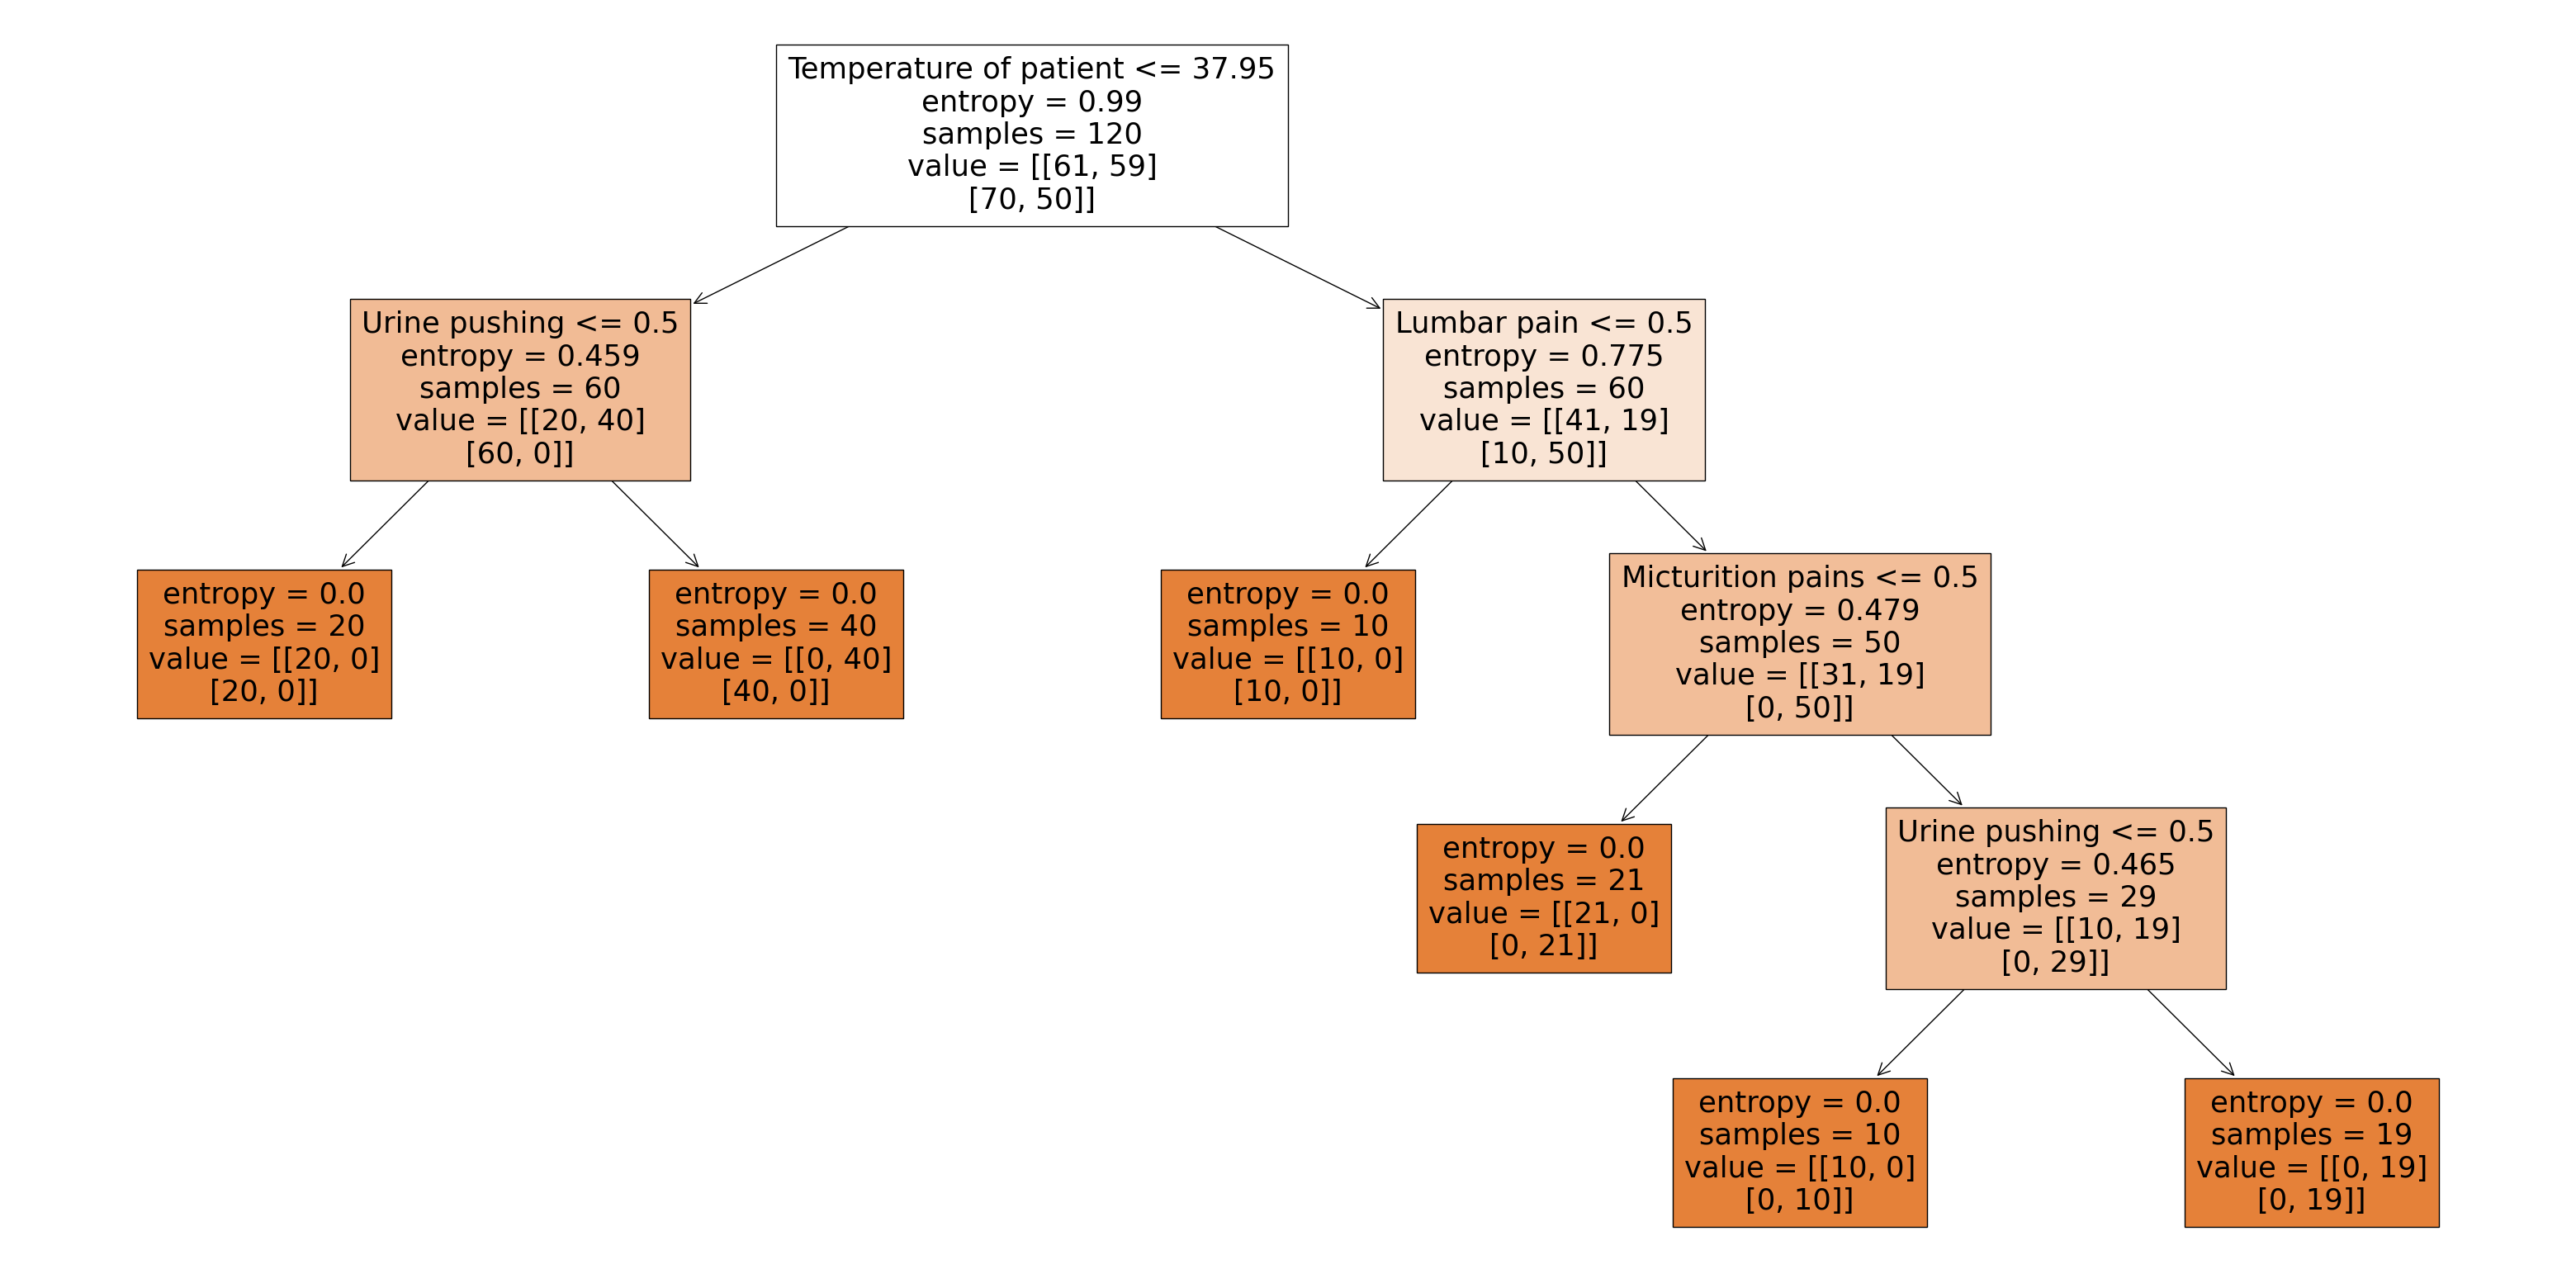

In [5]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
X = data.iloc[:,0:-2]
y = data.iloc[:,-2:]
dt.fit(X,y)
plt.figure(figsize =(40,20))
plot_tree(dt,feature_names = columns,filled =True)
dotfile = open("dt.dot", 'w')
tree.export_graphviz(dt, out_file=dotfile, feature_names=X.columns)
dotfile.close()

### (c) Convert the decision rules

In [202]:
from sklearn.tree import _tree
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))
    def recurse(node, depth): 
        indent=" "*depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))
    recurse(0, 1)

In [203]:
tree_to_code(dt,columns)

def tree(Temperature of patient, Occurrence of nausea, Lumbar pain, Urine pushing, Micturition pains, Urethra issues, Inflammation of bladder, Nephritis of renal pelvis):
 if Temperature of patient <= 37.95000076293945:
  if Lumbar pain <= 0.5:
   return [[ 0. 40.]
 [40.  0.]]
  else:  # if Lumbar pain > 0.5
   return [[20.  0.]
 [20.  0.]]
 else:  # if Temperature of patient > 37.95000076293945
  if Lumbar pain <= 0.5:
   return [[10.  0.]
 [10.  0.]]
  else:  # if Lumbar pain > 0.5
   if Micturition pains <= 0.5:
    return [[21.  0.]
 [ 0. 21.]]
   else:  # if Micturition pains > 0.5
    if Urine pushing <= 0.5:
     return [[10.  0.]
 [ 0. 10.]]
    else:  # if Urine pushing > 0.5
     return [[ 0. 19.]
 [ 0. 19.]]


In [204]:
def tree_to_pseudo(tree, feature_names):
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value
    def recurse(left, right, threshold, features, node, depth=0): 
        indent=" "*depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
        else:
            print(indent,"return " + str(value[node]))
    recurse(left, right, threshold, features, 0)

In [205]:
tree_to_pseudo(dt,columns)

 if ( Temperature of patient <= 37.95000076293945 ) {
  if ( Lumbar pain <= 0.5 ) {
   return [[ 0. 40.]
 [40.  0.]]
  } else {
   return [[20.  0.]
 [20.  0.]]
  }
 } else {
  if ( Lumbar pain <= 0.5 ) {
   return [[10.  0.]
 [10.  0.]]
  } else {
   if ( Micturition pains <= 0.5 ) {
    return [[21.  0.]
 [ 0. 21.]]
   } else {
    if ( Urine pushing <= 0.5 ) {
     return [[10.  0.]
 [ 0. 10.]]
    } else {
     return [[ 0. 19.]
 [ 0. 19.]]
    }
   }
  }
 }


### (d) cost complexity pruning

In [206]:
pruning = dt.cost_complexity_pruning_path(X,y)
display(pruning)
for col in y.columns:
    y[col]=binary.fit_transform(y[col])

{'ccp_alphas': array([0.        , 0.09979604, 0.18809344, 0.22957396, 0.3725747 ]),
 'impurities': array([0.        , 0.19959209, 0.38768553, 0.61725948, 0.98983419])}

In [207]:
param={'ccp_alpha':pruning['ccp_alphas']}

gridSearch = GridSearchCV(DecisionTreeClassifier(), param, cv=5, n_jobs=-1)
gridSearch.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.        , 0.09979604, 0.18809344, 0.22957396, 0.3725747 ])})

In [208]:
gridSearch.cv_results_


{'mean_fit_time': array([0.00240846, 0.00431833, 0.00217619, 0.00197964, 0.00163469]),
 'std_fit_time': array([0.00050278, 0.00281507, 0.00117517, 0.00052582, 0.00050808]),
 'mean_score_time': array([0.00249758, 0.00193791, 0.00240278, 0.00223556, 0.00151367]),
 'std_score_time': array([0.00065079, 0.00055168, 0.00068476, 0.0011529 , 0.00040702]),
 'param_ccp_alpha': masked_array(data=[0.0, 0.0997960439819062, 0.18809343741386597,
                    0.2295739585136224, 0.3725747026398485],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'ccp_alpha': 0.0},
  {'ccp_alpha': 0.0997960439819062},
  {'ccp_alpha': 0.18809343741386597},
  {'ccp_alpha': 0.2295739585136224},
  {'ccp_alpha': 0.3725747026398485}],
 'split0_test_score': array([1.        , 0.54166667, 0.54166667, 0.        , 0.        ]),
 'split1_test_score': array([1.  , 0.75, 0.  , 0.  , 0.  ]),
 'split2_test_score': array([0.75      , 0.66666667, 0.125    

In [209]:
gridSearch.best_params_

{'ccp_alpha': 0.0}

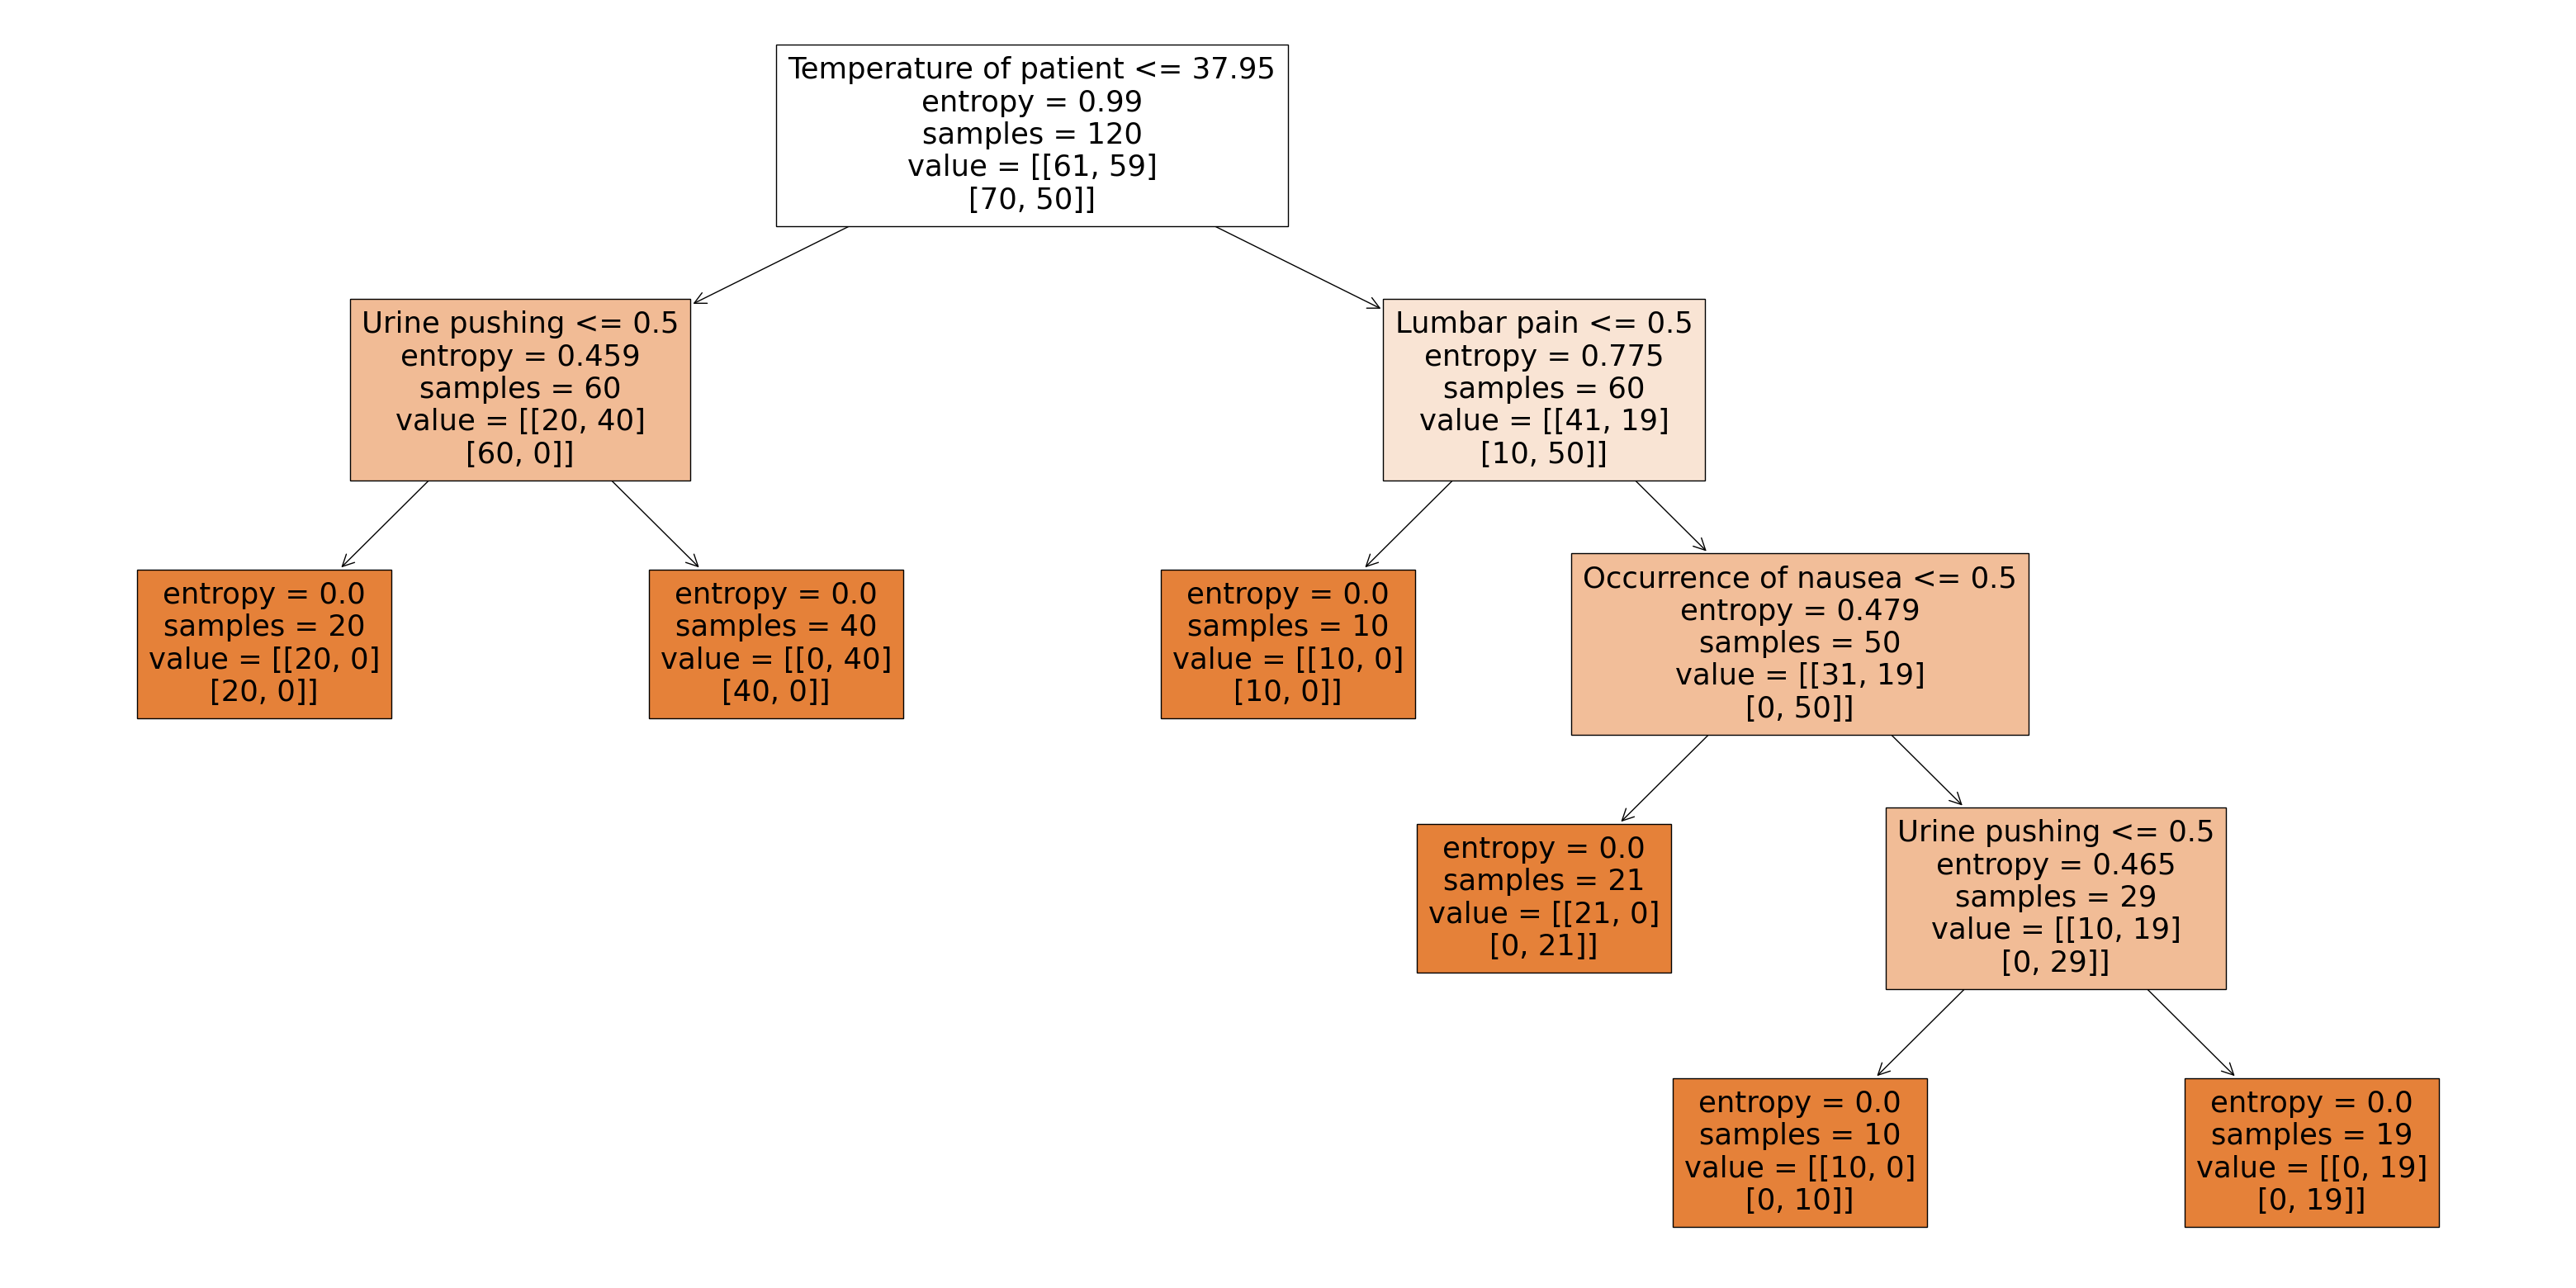

In [210]:
pruned_dt = tree.DecisionTreeClassifier(criterion='entropy')
X = data.iloc[:,0:-2]
y = data.iloc[:,-2:]
pruned_dt.fit(X,y)
plt.figure(figsize =(40,20))
plot_tree(pruned_dt,feature_names = columns,filled =True)
dotfile = open("pruned_dt.dot", 'w')
tree.export_graphviz(pruned_dt, out_file=dotfile, feature_names=X.columns)
dotfile.close()

In [211]:
tree_to_code(pruned_dt,columns)

def tree(Temperature of patient, Occurrence of nausea, Lumbar pain, Urine pushing, Micturition pains, Urethra issues, Inflammation of bladder, Nephritis of renal pelvis):
 if Temperature of patient <= 37.95000076293945:
  if Urine pushing <= 0.5:
   return [[20.  0.]
 [20.  0.]]
  else:  # if Urine pushing > 0.5
   return [[ 0. 40.]
 [40.  0.]]
 else:  # if Temperature of patient > 37.95000076293945
  if Lumbar pain <= 0.5:
   return [[10.  0.]
 [10.  0.]]
  else:  # if Lumbar pain > 0.5
   if Occurrence of nausea <= 0.5:
    return [[21.  0.]
 [ 0. 21.]]
   else:  # if Occurrence of nausea > 0.5
    if Urine pushing <= 0.5:
     return [[10.  0.]
 [ 0. 10.]]
    else:  # if Urine pushing > 0.5
     return [[ 0. 19.]
 [ 0. 19.]]


In [212]:
tree_to_pseudo(pruned_dt,columns)

 if ( Temperature of patient <= 37.95000076293945 ) {
  if ( Urine pushing <= 0.5 ) {
   return [[20.  0.]
 [20.  0.]]
  } else {
   return [[ 0. 40.]
 [40.  0.]]
  }
 } else {
  if ( Lumbar pain <= 0.5 ) {
   return [[10.  0.]
 [10.  0.]]
  } else {
   if ( Occurrence of nausea <= 0.5 ) {
    return [[21.  0.]
 [ 0. 21.]]
   } else {
    if ( Urine pushing <= 0.5 ) {
     return [[10.  0.]
 [ 0. 10.]]
    } else {
     return [[ 0. 19.]
 [ 0. 19.]]
    }
   }
  }
 }


## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [213]:
# there are many functions so let's write a function that will get all the columns instead of manually inputting them
columns=[]
with open('../data/communities.names') as file:
    for line in file:
        if '@attribute' in line:
            columns.append(line.split()[1])
data=pd.read_csv('../data/communities.data', sep=',', header = None, names = columns)
display(data)

state county community        communityname  fold  population  \
0         8      ?         ?         Lakewoodcity     1        0.19   
1        53      ?         ?          Tukwilacity     1        0.00   
2        24      ?         ?         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1989     12      ?         ?    TempleTerracecity    10        0.01   
1990      6      ?         ?          Seasidecity    10        0.05   
1991      9      9     80070        Waterburytown    10        0.16   
1992     25     17     72600          Walthamcity    10        0.08   
1993      6      ?         ?          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                  0.9   
1        0.12            0.45          ?              ?                    ?   
2        0.21            0.02          ?              ?                    ?   
3        0.39            0.28          ?              ?                    ?   
4        0.09            0.02          ?              ?                    ?   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05          ?              ?                    ?   
1990     0.37            0.20          ?              ?                    ?   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                       ?                 0.00                ?   
2                       ?                 0.00                ?   
3                       ?                 0.00                ?   
4                       ?                 0.00                ?   
...                   ...                  ...              ...   
1989                    ?                 0.00                ?   
1990                    ?                 0.00                ?   
1991                    0                 0.91             0.28   
1992                    0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

### (b) Missing values

In [214]:
# Attribute Information: (122 predictive, 5 non-predictive, 1 goal)
# state, county, community, communityname, fold
def replace_nan(x):
    if x == '?':
        return np.nan
    else: 
        return x
for col in data.columns:
    data[col]=data[col].apply(lambda x:replace_nan(x))
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data.iloc[:,5:]=imp.fit_transform(data.iloc[:,5:])
# display(data)
ndata=data.iloc[:,5:] # only predictive features
for col in ndata.columns:
    if ndata[col].dtype=='object':
        ndata[col]=ndata[col].astype('float')
train,test=ndata[:1495],ndata[1495:]

/var/folders/c_/75z03kpj69bd8p6rwkb71sg40000gn/T/ipykernel_1857/2200311006.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,5:]=imp.fit_transform(data.iloc[:,5:])


### (c) Plot a correlation matrix

In [215]:
corr=ndata.corr()
corr.style.background_gradient(cmap='coolwarm')

### (d) Calculate the Coefficient of Variation CV

In [216]:
# no need to calculate the to be predicted variable
coefficient_cv=ndata.iloc[:,:-1].apply(lambda x: np.std(x)/np.mean(x)*100)
for col in coefficient_cv.index:
    print(col,'=',coefficient_cv[col])

population = 220.2949933865333
householdsize = 35.32097004119036
racepctblack = 141.05665605340317
racePctWhite = 32.3700363360136
racePctAsian = 135.88213380942605
racePctHisp = 161.38729571484004
agePct12t21 = 36.57481221627096
agePct12t29 = 29.061998738004714
agePct16t24 = 49.503633617805406
agePct65up = 42.33355166105005
numbUrban = 200.1241633513716
pctUrban = 63.868865832578415
medIncome = 57.96080008727302
pctWWage = 32.76278742640529
pctWFarmSelf = 69.98545594658843
pctWInvInc = 35.914985569917434
pctWSocSec = 36.84202133633646
pctWPubAsst = 69.88551987450087
pctWRetire = 34.95513990736714
medFamInc = 52.75995387856811
perCapInc = 54.54965924474844
whitePerCap = 50.742490490354754
blackPerCap = 58.93211744649136
indianPerCap = 80.9482031042265
AsianPerCap = 60.604182734043
OtherPerCap = 67.04763858174293
HispPerCap = 47.38408572341726
NumUnderPov = 230.43916660118086
PctPopUnderPov = 75.37910884956594
PctLess9thGrade = 67.54307871530841
PctNotHSGrad = 52.81537809121705
PctBSorM

### (e) Scatter plots and box plots for highest CV features

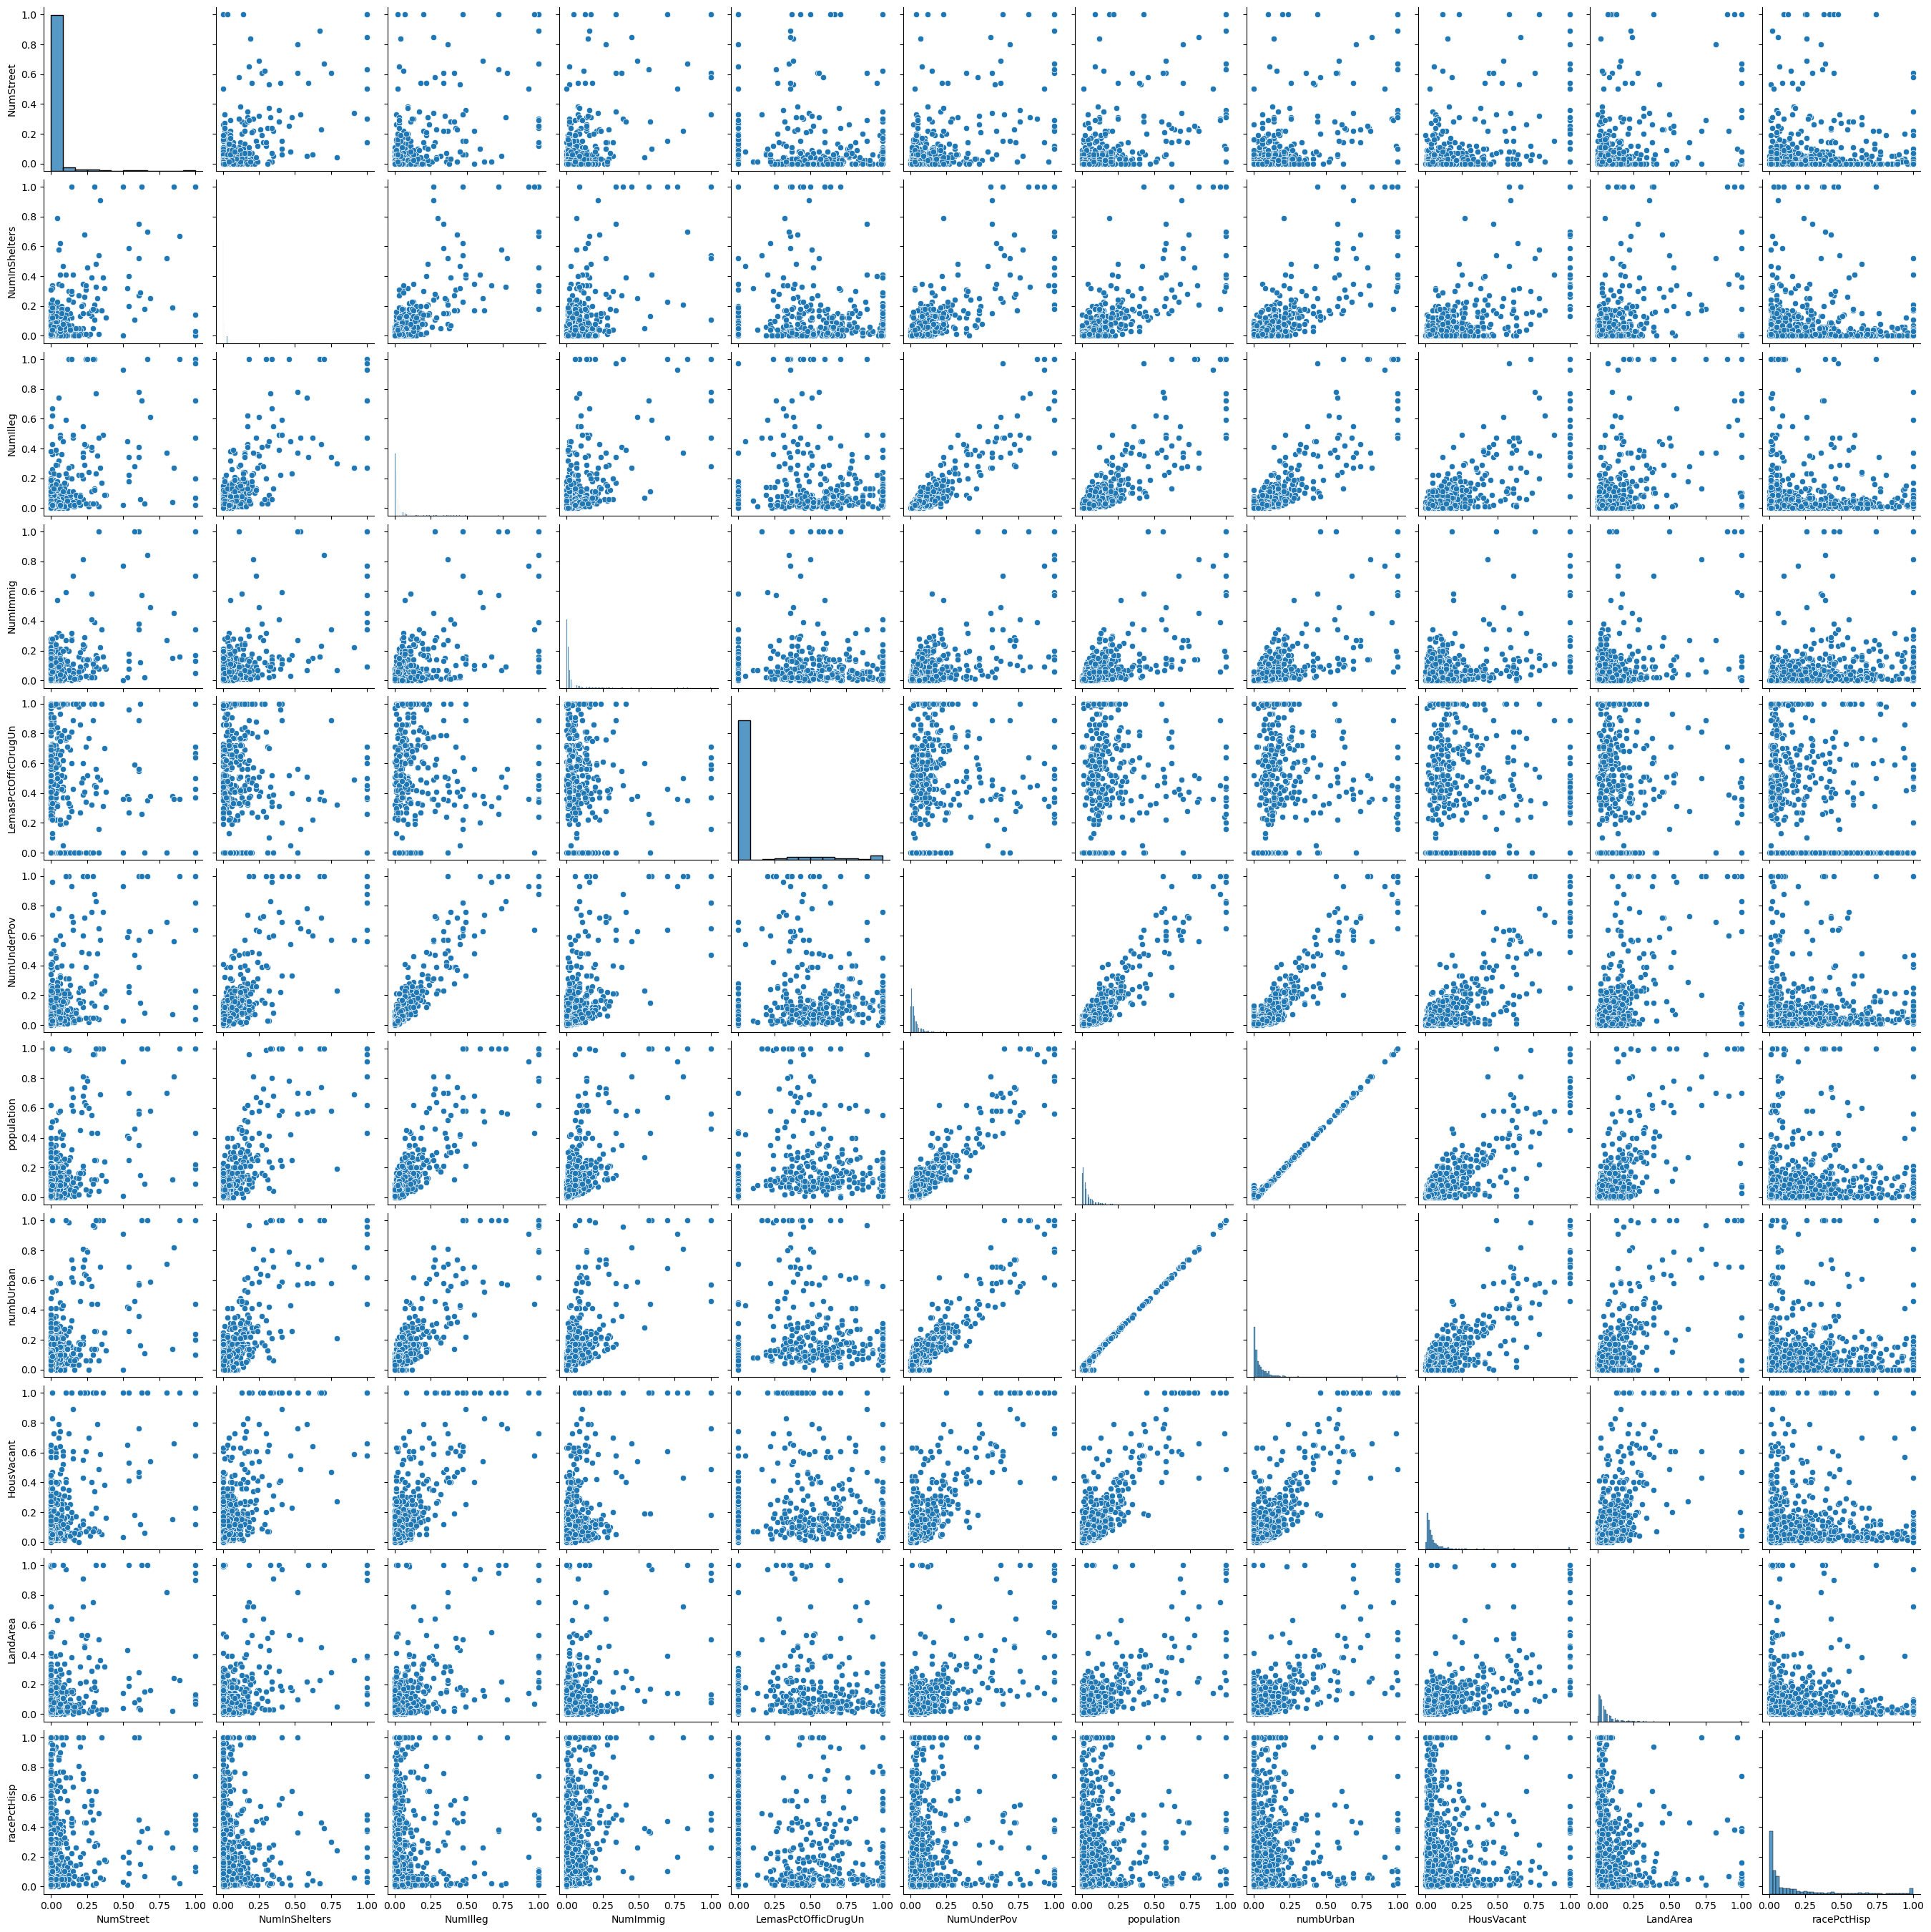

In [217]:
sorted_cv=coefficient_cv.sort_values(ascending=False)
# pick sqr(128) of the features with highest cv
import math
top = int(math.sqrt(128))
top_features=sorted_cv.index[0:top]
top_features
sns.pairplot(ndata[top_features])

I can not draw conclusions about the significance of each of these features just from the pairplot. I can see clear correlations between featues, like urban and population, but this does not indicate a clear significance of these features.

<Axes: >

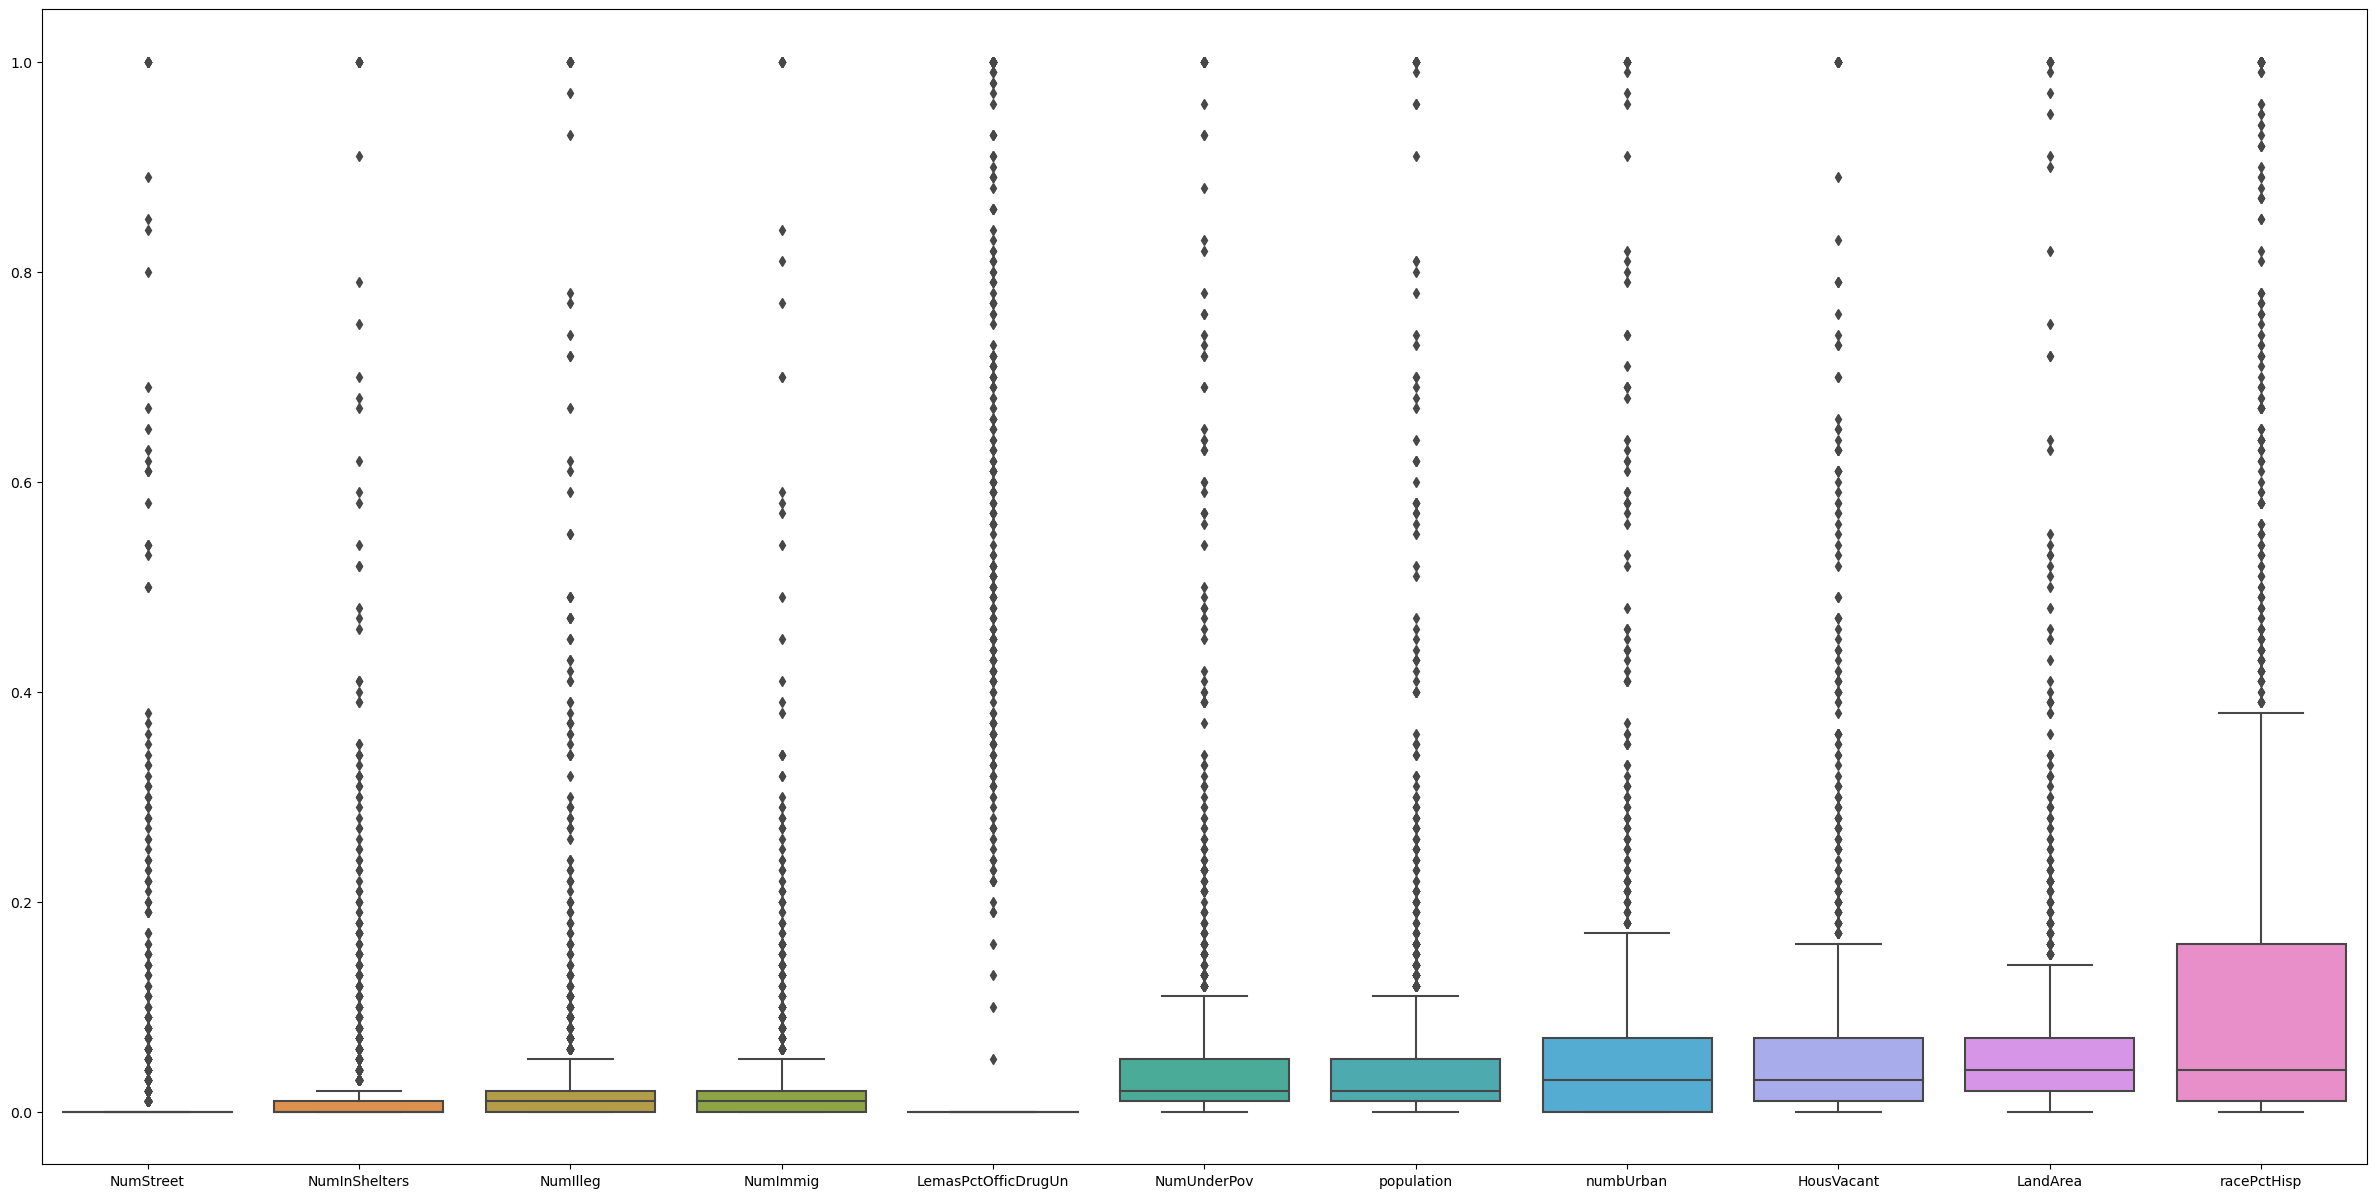

In [218]:
plt.figure(figsize=(30,15))
sns.boxplot(data=ndata[top_features])

The boxplot also does not really give information on the signifcance of the features, it only really tells us the range of data for each feature.

### (f) Fit a linear model

In [219]:
X,y=ndata.iloc[:,:-1],ndata['ViolentCrimesPerPop']
X_train,X_test=X[:1495],X[1495:]
y_train,y_test=y[:1495],y[1495:]
# least squares method linear model
lregression=LinearRegression()
lregression=lregression.fit(X_train,y_train)
y_pred=lregression.predict(X_test)
mse_lregression = mean_squared_error(y_test, y_pred)
print('test error=',mse_lregression)

test error= 0.7897255274384668


### (g) Fit a ridge regression model

In [220]:
rregression = RidgeCV()
alphas = [0.01, 0.1, 1.0, 10.0]  # List of alpha values to try
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)  # Perform cross-validation
ridge_cv.fit(X_train, y_train)
best_alpha = ridge_cv.alpha_
ridge_model = Ridge(alpha = best_alpha)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mse_rregression = mean_squared_error(y_test, y_pred)

print('test error=',mse_rregression)

test error= 0.017737081104303682


### (h) Fit a LASSO model

In [221]:
#Lasso normalized
lasso_regression=LassoCV(max_iter=1500)
lasso_regression.fit(X_train,y_train)
y_pred=lasso_regression.predict(X_test)
print('test error=',mean_squared_error(y_test,y_pred))

print('chosen coefficients:')
for i in range(0,len(X.columns)):
    if lasso_regression.coef_[i]!=0:
        print(X.columns[i],':',lasso_regression.coef_[i])

test error= 0.01776331001785825
chosen coefficients:
racepctblack : 0.2719890806759893
racePctAsian : -0.015489183016620648
agePct12t21 : 0.0663068800178733
agePct12t29 : -0.265007560751502
pctUrban : 0.04051855000983897
pctWWage : -0.08474297249597222
pctWFarmSelf : 0.026563751491558006
pctWInvInc : -0.0983065309341359
pctWSocSec : 0.04857451340458476
pctWPubAsst : 0.03880390286304713
pctWRetire : -0.10843719046535583
whitePerCap : -0.05768277783347706
blackPerCap : -0.021104804881505013
indianPerCap : -0.03112233445326159
AsianPerCap : 0.02901415784655283
OtherPerCap : 0.022710891815328635
HispPerCap : 0.02393702868675847
PctPopUnderPov : -0.14123178274870749
PctLess9thGrade : -0.01816706101653425
PctEmploy : 0.1373473488613637
PctEmplManu : -0.015779994235523852
PctOccupManu : 0.010230195656757177
MalePctDivorce : 0.11814669010826671
MalePctNevMarr : 0.13327799275885227
FemalePctDiv : -0.0784757578195406
PctKids2Par : -0.1964880009360129
PctYoungKids2Par : -0.03777153855537079
PctTe

In [222]:
lasso_regression=LassoCV(max_iter=1500)
standard_scaler=StandardScaler()

lasso_regression.fit(standard_scaler.fit_transform(X_train),y_train)
y_pred=lasso_regression.predict(standard_scaler.transform(X_test))
print('test error=',mean_squared_error(y_test,y_pred))
print('chosen coefficients:')
for i in range(0,len(X.columns)):
    if lasso_regression.coef_[i]!=0:
        print(X.columns[i],':',lasso_regression.coef_[i])

test error= 0.017810499483270535
chosen coefficients:
racepctblack : 0.06825952168266121
racePctAsian : -0.0008869549482896059
agePct12t21 : 0.010316887014133178
agePct12t29 : -0.038187181196526206
pctUrban : 0.016596760165681967
pctWWage : -0.012031048799655405
pctWFarmSelf : 0.00409089859815785
pctWInvInc : -0.020798627394494843
pctWSocSec : 0.008905031591624089
pctWPubAsst : 0.006134048984523383
pctWRetire : -0.01718745298772012
whitePerCap : -0.008601901094764507
blackPerCap : -0.003648643639493634
indianPerCap : -0.005237242600816368
AsianPerCap : 0.005307444995295808
OtherPerCap : 0.003818543884901242
HispPerCap : 0.0039914791364064305
PctPopUnderPov : -0.026751911021071082
PctLess9thGrade : -0.0020122102167289477
PctEmploy : 0.02118985599954822
PctEmplManu : -0.001053592558372595
MalePctDivorce : 0.01898780286388921
MalePctNevMarr : 0.020704297638561187
FemalePctDiv : -0.010036031154269676
PctKids2Par : -0.039804257000744914
PctYoungKids2Par : -0.008193167704251974
PctTeen2Par :

they both have similar test errors, but the standardized features are slightly worse than normalized features. lassocv also automatically uses the most optimal lambda value.

### (i) Fit a PCR model

In [224]:
best_m=1
best_score=0
for i in range(1,123):
    pipeline=make_pipeline(PCA(n_components=i), LinearRegression())
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    if best_score<scores.mean():
        best_m=i
        best=scores.mean()

In [ ]:
print(best_m,':',best)

122 : 0.6345239984290936


In [ ]:
pipeline=make_pipeline(StandardScaler(), PCA(n_components=best_m), LinearRegression())
pcr=pipeline.fit(X_train,y_train)
y_pred=pcr.predict(X_test)
print('test error=',mean_squared_error(y_test,y_pred))

test error= 0.789725527420953


### (j) Fit a boosting tree

In [ ]:
alphas=[10**i for i in range(-4,4)]
alphas+=[i/100 for i in range(25,1000,25)]
param_dict={'reg_alpha':alphas}
xgb_reg=xgboost.XGBRegressor()
grid_cv=GridSearchCV(xgb_reg,param_dict)
grid_cv.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                       1000, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                       1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25,
                                       3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0,
                                       5.25, 5.5, ...]})

In [ ]:
print(grid_cv.best_params_)

xgb_best=xgboost.XGBRegressor(reg_alpha=grid_cv.best_params_['reg_alpha'])
xgb_best.fit(X_train,y_train)
y_pred=xgb_best.predict(X_test)
print('test error =',mean_squared_error(y_test,y_pred))

{'reg_alpha': 4.0}
test error = 0.017584000280926965


best alpha is 4.0 with a test mse of 0.01758